# Introduction

## Purpose of the project

## Data scraping

# The dataset

* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values *above 0.5* are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* **liveness**:
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value *above 0.8* provides strong likelihood that the track is live.

* **speechiness**:
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values *above 0.66* describe tracks that are probably made entirely of spoken words. Values *between 0.33 and 0.66* describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values *below 0.33* most likely represent music and other non-speech-like tracks.

* **valence**:
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with *high valence* sound *more positive* (e.g. happy, cheerful, euphoric), while tracks with *low valence* sound *more negative* (e.g. sad, depressed, angry).

* **tempo**:
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

## Code

In [140]:
# importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sep = ";"

In [141]:
sns.set_palette("Set2") # set seaborn color palette

In [142]:
df = pd.read_csv('data.csv',sep=sep)

In [143]:
df.head() # check data shape

,track_name,artists,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,popularity,year,ranking,critic score,popularity_normalized
0,Wouldn't It Be Nice,The Beach Boys,Greatest Hits,0.385,0.657,5,-6.975,1,0.0342,0.724000,...,0.1050,0.672,124.895,153867,4,60,2012,1,1,"0,6125"
1,God Only Knows,The Beach Boys,50 Big Ones: Greatest Hits,0.433,0.469,6,-9.853,0,0.0320,0.156000,...,0.0479,0.334,115.876,175787,4,51,2012,1,1,"0,5"
2,Sinnerman,Nina Simone,Pastel Blues,0.436,0.543,11,-13.351,0,0.0962,0.654000,...,0.0937,0.663,148.282,622000,4,63,1965,2,"0,997995992","0,65"
3,How to Disappear Completely,Radiohead,Kid A,0.167,0.302,6,-11.644,0,0.0345,0.316000,...,0.1100,0.190,102.026,356333,4,67,2000,3,"0,995991984","0,7"
4,when you sleep,my bloody valentine,loveless,0.399,0.866,6,-9.720,1,0.0558,0.000034,...,0.0785,0.125,128.864,251947,4,62,1991,4,"0,993987976","0,6375"


Dropping columns which are not useful to our analysis

In [144]:
df1 = df.drop(['time_signature','mode','key','liveness','popularity','ranking'],axis=1)


In [145]:
df1.head() #check if columns where properly dropped

,track_name,artists,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,year,critic score,popularity_normalized
0,Wouldn't It Be Nice,The Beach Boys,Greatest Hits,0.385,0.657,-6.975,0.0342,0.724000,0.000000,0.672,124.895,153867,2012,1,"0,6125"
1,God Only Knows,The Beach Boys,50 Big Ones: Greatest Hits,0.433,0.469,-9.853,0.0320,0.156000,0.000000,0.334,115.876,175787,2012,1,"0,5"
2,Sinnerman,Nina Simone,Pastel Blues,0.436,0.543,-13.351,0.0962,0.654000,0.000009,0.663,148.282,622000,1965,"0,997995992","0,65"
3,How to Disappear Completely,Radiohead,Kid A,0.167,0.302,-11.644,0.0345,0.316000,0.797000,0.190,102.026,356333,2000,"0,995991984","0,7"
4,when you sleep,my bloody valentine,loveless,0.399,0.866,-9.720,0.0558,0.000034,0.738000,0.125,128.864,251947,1991,"0,993987976","0,6375"


### Pre-processing columns

In this section we prepare the columns `year` and `duration_ms` for discretization

* **year**: Convert release date to the decade the album was released in order to discretize the value in order to obtain the **'decade'** column.

In [146]:
df1['decade'] = (10 * (df1['year'] // 10)) 

In [147]:
#Printing the min and max values of Release date in order to better discretize the release date 
# column
print(np.min(df1['decade']), np.max(df1['decade']))

1920 2020


### Approximate duration into minutes

* **duration_ms**: Through a helper function we convert duration_ms into **'duration_min '**
 


The get_min function takes as input an int value in milliseconds and converts it into an integer
that corresponds to the nearest minute. For example, that means that if a duration in milliseconds 
is equal 3 minutes and 30 seconds it is approximated to the nearest minute which is 4.



In [148]:
def get_min(ms):
    minutes=float(ms/float(1000*60))%60.
    return int((round(minutes,0))
)

In [149]:
print(get_min(210000),'minutes') # 210000 milliseconds is equal to 3 minutes and 30 seconds
print(get_min(209000),'minutes') # 209000 milliseconds is equal to 3 minutes and 29 seconds

4 minutes
3 minutes


In [150]:
df1['duration_min'] =df1['duration_ms'].apply(lambda x: get_min(x)) # use apply function to use the get min function on every row of the get_min column
df1.head()

,track_name,artists,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,year,critic score,popularity_normalized,decade,duration_min
0,Wouldn't It Be Nice,The Beach Boys,Greatest Hits,0.385,0.657,-6.975,0.0342,0.724000,0.000000,0.672,124.895,153867,2012,1,"0,6125",2010,3
1,God Only Knows,The Beach Boys,50 Big Ones: Greatest Hits,0.433,0.469,-9.853,0.0320,0.156000,0.000000,0.334,115.876,175787,2012,1,"0,5",2010,3
2,Sinnerman,Nina Simone,Pastel Blues,0.436,0.543,-13.351,0.0962,0.654000,0.000009,0.663,148.282,622000,1965,"0,997995992","0,65",1960,10
3,How to Disappear Completely,Radiohead,Kid A,0.167,0.302,-11.644,0.0345,0.316000,0.797000,0.190,102.026,356333,2000,"0,995991984","0,7",2000,6
4,when you sleep,my bloody valentine,loveless,0.399,0.866,-9.720,0.0558,0.000034,0.738000,0.125,128.864,251947,1991,"0,993987976","0,6375",1990,4


In [151]:
df1[df1['duration_min'] > 15] # Drop rows with songs that are too long

,track_name,artists,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,year,critic score,popularity_normalized,decade,duration_min
181,The Dripping Tap,King Gizzard & The Lizard Wizard,Omnium Gatherum,0.188,0.942,-4.706,0.1910,0.000505,0.620,0.2310,179.248,1097013,2022,"0,679358717","0,55",2020,18
295,Head On/Pill - Live in San Francisco '16,King Gizzard & The Lizard Wizard,Live in San Francisco '16,0.184,0.719,-9.043,0.0930,0.056900,0.197,0.1680,193.214,1350627,2020,"0,468937876","0,1125",2020,23
369,The Diamond Sea,Sonic Youth,Washing Machine,0.260,0.641,-8.696,0.0414,0.149000,0.293,0.0433,114.534,1177293,1995,"0,322645291","0,325",1990,20


In [152]:
df2 = df1.drop(df1[df1.duration_min > 15].index,axis=0) 

In [153]:
# Remove live songs
df3=df2.drop(df2[df2['album'].str.contains("live", case=False)].index,axis=0)

In [154]:
df3.head()

,track_name,artists,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,year,critic score,popularity_normalized,decade,duration_min
0,Wouldn't It Be Nice,The Beach Boys,Greatest Hits,0.385,0.657,-6.975,0.0342,0.724000,0.000000,0.672,124.895,153867,2012,1,"0,6125",2010,3
1,God Only Knows,The Beach Boys,50 Big Ones: Greatest Hits,0.433,0.469,-9.853,0.0320,0.156000,0.000000,0.334,115.876,175787,2012,1,"0,5",2010,3
2,Sinnerman,Nina Simone,Pastel Blues,0.436,0.543,-13.351,0.0962,0.654000,0.000009,0.663,148.282,622000,1965,"0,997995992","0,65",1960,10
3,How to Disappear Completely,Radiohead,Kid A,0.167,0.302,-11.644,0.0345,0.316000,0.797000,0.190,102.026,356333,2000,"0,995991984","0,7",2000,6
4,when you sleep,my bloody valentine,loveless,0.399,0.866,-9.720,0.0558,0.000034,0.738000,0.125,128.864,251947,1991,"0,993987976","0,6375",1990,4


In [155]:
df4=df3.drop(["duration_ms","year"],axis=1) # drop no longer useful columns

In [156]:
df4.dtypes #check if all data datatypes are ok

track_name                object
artists                   object
album                     object
danceability             float64
energy                   float64
loudness                 float64
speechiness              float64
acousticness             float64
instrumentalness         float64
valence                  float64
tempo                    float64
critic score              object
popularity_normalized     object
decade                     int64
duration_min               int64
dtype: object

`critic score` is treated as an object therefore we need to check if it is a `string` 

In [157]:
print("Checking type of  critic score .... ")
type_c = type(df4['critic score'][0])
type_c

Checking type of  critic score .... 


str

In [158]:
# critic score was a string so we are casting it to a float
df4['critic score'] = df4['critic score'].str.replace(',','.') # change decimal to dot instead of comma
df4['critic score'] = df4['critic score'].astype(float)
df4.dtypes # Now critic score is a float , need to reapeat the same with popularity_normalized    

track_name                object
artists                   object
album                     object
danceability             float64
energy                   float64
loudness                 float64
speechiness              float64
acousticness             float64
instrumentalness         float64
valence                  float64
tempo                    float64
critic score             float64
popularity_normalized     object
decade                     int64
duration_min               int64
dtype: object

In [159]:
# popularity_normalized was a string so we are casting it to a float
df4['popularity_normalized'] = df4['popularity_normalized'].str.replace(',','.') # change decimal to dot instead of comma
df4['popularity_normalized'] = df4['popularity_normalized'].astype(float)
df4.dtypes     

track_name                object
artists                   object
album                     object
danceability             float64
energy                   float64
loudness                 float64
speechiness              float64
acousticness             float64
instrumentalness         float64
valence                  float64
tempo                    float64
critic score             float64
popularity_normalized    float64
decade                     int64
duration_min               int64
dtype: object

In [160]:
df4.head()

,track_name,artists,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,critic score,popularity_normalized,decade,duration_min
0,Wouldn't It Be Nice,The Beach Boys,Greatest Hits,0.385,0.657,-6.975,0.0342,0.724000,0.000000,0.672,124.895,1.000000,0.6125,2010,3
1,God Only Knows,The Beach Boys,50 Big Ones: Greatest Hits,0.433,0.469,-9.853,0.0320,0.156000,0.000000,0.334,115.876,1.000000,0.5000,2010,3
2,Sinnerman,Nina Simone,Pastel Blues,0.436,0.543,-13.351,0.0962,0.654000,0.000009,0.663,148.282,0.997996,0.6500,1960,10
3,How to Disappear Completely,Radiohead,Kid A,0.167,0.302,-11.644,0.0345,0.316000,0.797000,0.190,102.026,0.995992,0.7000,2000,6
4,when you sleep,my bloody valentine,loveless,0.399,0.866,-9.720,0.0558,0.000034,0.738000,0.125,128.864,0.993988,0.6375,1990,4


### Inspecting relationship between variables

We want to understand if we can have some prior knowledge on the relationship between the variables by looking at the correlation between them.

We make 2 correlation plots, one for `critic score` and one for `pop_scal` because if we have both `critic score` and `popularity_scal` the correlation plot is difficult to read, moreover we have chosen to use `pearson` correlation. Lastly, we drop `popularity` which was already processed.

In [161]:
# drop non relevant columns
dfp=df4.drop(["critic score"],axis=1)

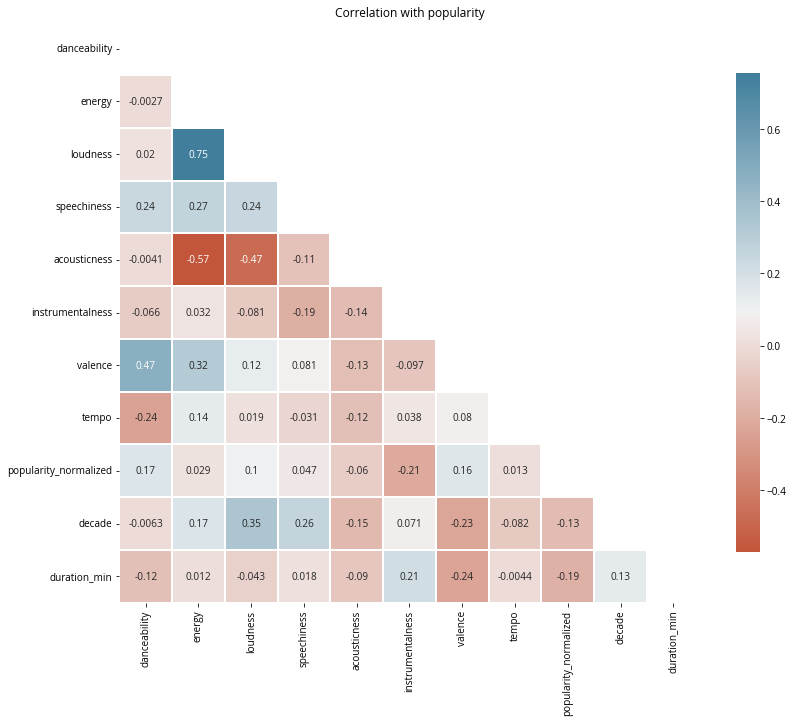

In [162]:
plt.figure(figsize=(13,11))
plt.title("Correlation with popularity")
corr = dfp.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, 
            mask=mask, 
            annot=True, 
            cmap=sns.diverging_palette(20, 230, as_cmap=True),   
            square = True,                                 
            linewidths = 1.5,
            cbar_kws = {"shrink": .8});

In [163]:
dfc=df4.drop(["popularity_normalized"],axis=1)

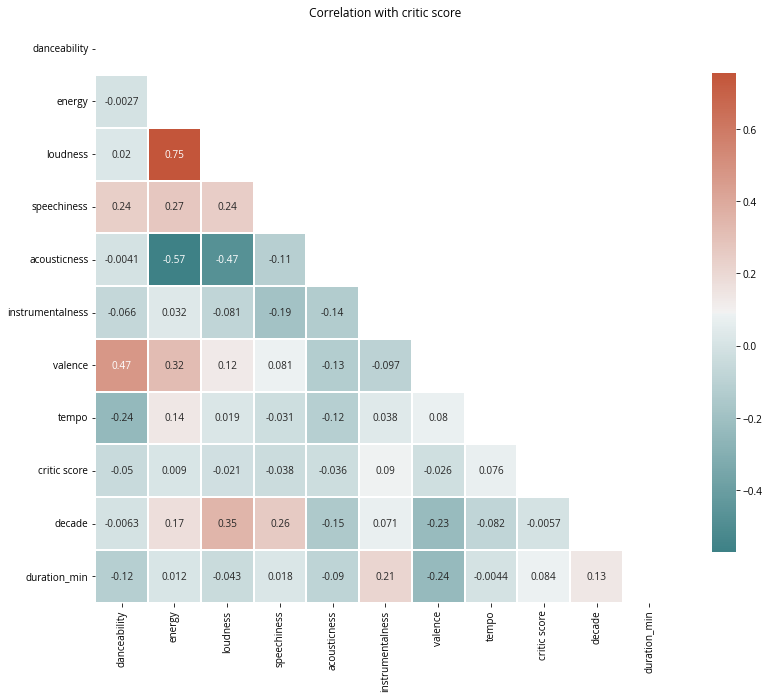

In [164]:
plt.figure(figsize=(13,11))
corr = dfc.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.title("Correlation with critic score")
sns.set_palette("Set2")
sns.heatmap(corr, 
            mask=mask, 
            annot=True, 
            cmap=sns.diverging_palette(200, 20, as_cmap=True),   
            square = True,                                 
            linewidths = 1.5,
            cbar_kws = {"shrink": .8});

The correlation plot of `popularity_normalized` is particularly useful because it highlights a lot of relationship between our variables. Instead from the `critic score` plot we cannnot deduce any useful relation.

Getting most correlated pairs of variables

In [165]:
corr_df = dfc.corr().abs() # we are interested in extracting the magnitude of the correlation

corr_ser = corr_df.unstack() # Convert the corr_df to a pandas series
corr_ser_so = corr_ser.sort_values(kind="quicksort",ascending=False) 
no_dup = corr_ser_so[(corr_ser_so < 0.9 ) & (corr_ser_so >= 0.18)].drop_duplicates()
no_dup

loudness      energy              0.754051
acousticness  energy              0.571057
              loudness            0.474788
valence       danceability        0.474150
decade        loudness            0.348556
valence       energy              0.316167
energy        speechiness         0.271381
speechiness   decade              0.258126
loudness      speechiness         0.242535
danceability  tempo               0.241476
speechiness   danceability        0.237682
valence       duration_min        0.235908
decade        valence             0.230263
duration_min  instrumentalness    0.214456
speechiness   instrumentalness    0.188608
dtype: float64

In [166]:
print(f"There are {len(no_dup)} variables above the selected correlation threshold")

There are 15 variables above the selected correlation threshold


- loudness &rarr; energy
- year &rarr; energy 
- acousticness &rarr; loudness, energy 
- valence &rarr; danceability,energy

Inserisci le varie coppie

In [167]:
pal = sns.color_palette('Set2') # get colors for highlighting the quantiles
pal.as_hex()
pal.as_hex()[:]

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3']

## Discretization


Inserisci qui spiegazione sulla durata della canzone

# Pre-processed columns

These columns are relatively easy to discretize because they are not domain dependent attributes and we are able to use common knowledge about the musical domain for defining the labels ranges.

### 1. decade &rarr; Musical era

Each discretized decade has been mapped into a label in the column **'era'** . For the labels we used some kind of intuition to determine the labels associated with each group of decade.  



The rationale is:

-  Albums released in a decade in range `[1910-1970]` are considered as **vintage**. This is a reasonable assumption considering 1970 was 50 years ago.

- Albums released in a decade in range `[1980-2000]` are considered as **modern**.

- Albums released in a decade in range `[2010-2020]` are considered as **contemporary**.

In [168]:
df4['era']=pd.cut(x=df4['decade'], bins=[1910,1970,2000,2020], 
                        labels=["vintage","modern","contemporary"])


### 2. duration_min &rarr; era

Plots with standard quantiles

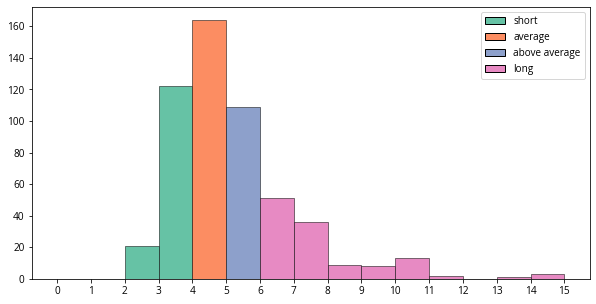

In [169]:
from matplotlib.patches import Rectangle # used for drawing colored patches
fig, ax = plt.subplots(figsize = (10,5))

cols = pal.as_hex()[:4] # save colors for labeling of quantiles


N, bins, patches = ax.hist(df2.duration_min,bins=range(np.max(df2.duration_min)+1), edgecolor='black', linewidth=0.5)

#get standard the first, second and third quantile
quant_25, quant_50, quant_75= int(df2.duration_min.quantile(0.25)),int(df2.duration_min.quantile(0.50)),int(df2.duration_min.quantile(0.75))

# color each patch with one of the colors
for i in range(0,quant_25+1):
    patches[i].set_facecolor(cols[0])
for i in range(quant_25+1 ,quant_50+1):    
    patches[i].set_facecolor(cols[1])
for i in range(quant_50+1, quant_75+1):
    patches[i].set_facecolor(cols[2])
for i in range(quant_75+1, len(patches)):
    patches[i].set_facecolor(cols[3])

#create legend for labels
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in  cols]
labels= ["short","average","above average","long"] # labels we want to use for discretization
plt.xticks(np.arange(0, max(df2.duration_min)+1, 1.0)) # set x-axis range
plt.legend(handles, labels)
plt.show()

Explain histogram

Plots with standard values for song duration:
- a song duration below 3 minutes is considered as *short*
- a song duration between 3 and 4 minutes is considered as *average*
- a song duration between 4 and 6 minutes is *above average*
- a song duration above 6 is considered as *long*

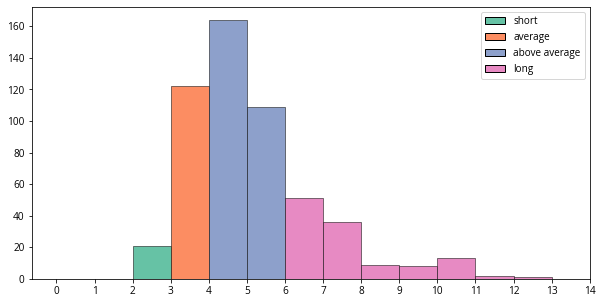

In [170]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize = (10,5))

cols = pal.as_hex()[:4]

N, bins, patches = ax.hist(df2.duration_min,bins=range(14), edgecolor='black', linewidth=0.5)


for i in range(0,3):
    patches[i].set_facecolor(cols[0])
for i in range(3 ,4):    
    patches[i].set_facecolor(cols[1])
for i in range(4, 6):
    patches[i].set_facecolor(cols[2])
for i in range(6, len(patches)):
    patches[i].set_facecolor(cols[3])


handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in  cols]
labels= ["short","average","above average","long"]
plt.xticks(np.arange(0, max(df2.duration_min), 1.0))

plt.legend(handles, labels)

plt.show()


Now we proceed with the actual discretization, we have opted to not use quantiles here because of preexisting knowledge for song duration. From data ` inserire qui fonte` we know the average song duration nowdays is 3 minutes and 30 seconds.

In [171]:
df4['dur']=pd.cut(x=df4['duration_min'],bins=[0,2,3,5,np.max(df4.duration_min)+1], 
                        labels=["short","average","above average","long"])

In [172]:
df4.head()

,track_name,artists,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,critic score,popularity_normalized,decade,duration_min,era,dur
0,Wouldn't It Be Nice,The Beach Boys,Greatest Hits,0.385,0.657,-6.975,0.0342,0.724000,0.000000,0.672,124.895,1.000000,0.6125,2010,3,contemporary,average
1,God Only Knows,The Beach Boys,50 Big Ones: Greatest Hits,0.433,0.469,-9.853,0.0320,0.156000,0.000000,0.334,115.876,1.000000,0.5000,2010,3,contemporary,average
2,Sinnerman,Nina Simone,Pastel Blues,0.436,0.543,-13.351,0.0962,0.654000,0.000009,0.663,148.282,0.997996,0.6500,1960,10,vintage,long
3,How to Disappear Completely,Radiohead,Kid A,0.167,0.302,-11.644,0.0345,0.316000,0.797000,0.190,102.026,0.995992,0.7000,2000,6,modern,long
4,when you sleep,my bloody valentine,loveless,0.399,0.866,-9.720,0.0558,0.000034,0.738000,0.125,128.864,0.993988,0.6375,1990,4,modern,above average


In [173]:
# Drop unused columns
df5 = df4.drop(["decade","duration_min"],axis=1)


Check if everything is ok with the dataframe

In [174]:
df5.head()

,track_name,artists,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,critic score,popularity_normalized,era,dur
0,Wouldn't It Be Nice,The Beach Boys,Greatest Hits,0.385,0.657,-6.975,0.0342,0.724000,0.000000,0.672,124.895,1.000000,0.6125,contemporary,average
1,God Only Knows,The Beach Boys,50 Big Ones: Greatest Hits,0.433,0.469,-9.853,0.0320,0.156000,0.000000,0.334,115.876,1.000000,0.5000,contemporary,average
2,Sinnerman,Nina Simone,Pastel Blues,0.436,0.543,-13.351,0.0962,0.654000,0.000009,0.663,148.282,0.997996,0.6500,vintage,long
3,How to Disappear Completely,Radiohead,Kid A,0.167,0.302,-11.644,0.0345,0.316000,0.797000,0.190,102.026,0.995992,0.7000,modern,long
4,when you sleep,my bloody valentine,loveless,0.399,0.866,-9.720,0.0558,0.000034,0.738000,0.125,128.864,0.993988,0.6375,modern,above average


In [175]:
df5[df5.isnull().any(axis=1)]

,track_name,artists,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,critic score,popularity_normalized,era,dur


## Raw numerical columns

Now we need to discretize columns for which we need to rely on pre-existing knowledge provided by the `Spotify API` or if this is not provided using quantiles to compute the discretization. In order to better understand these columns we need to plot the histogram for those.

In [176]:
column_list=df5.columns.tolist()
print(df5.columns.tolist())

['track_name', 'artists', 'album', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'critic score', 'popularity_normalized', 'era', 'dur']


In [177]:
non_str_col = [col for col in df5.columns if col not in ['track_name', 'artists', 'album','era', 'dur']] 
print(non_str_col)
len(non_str_col)

['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'critic score', 'popularity_normalized']


10

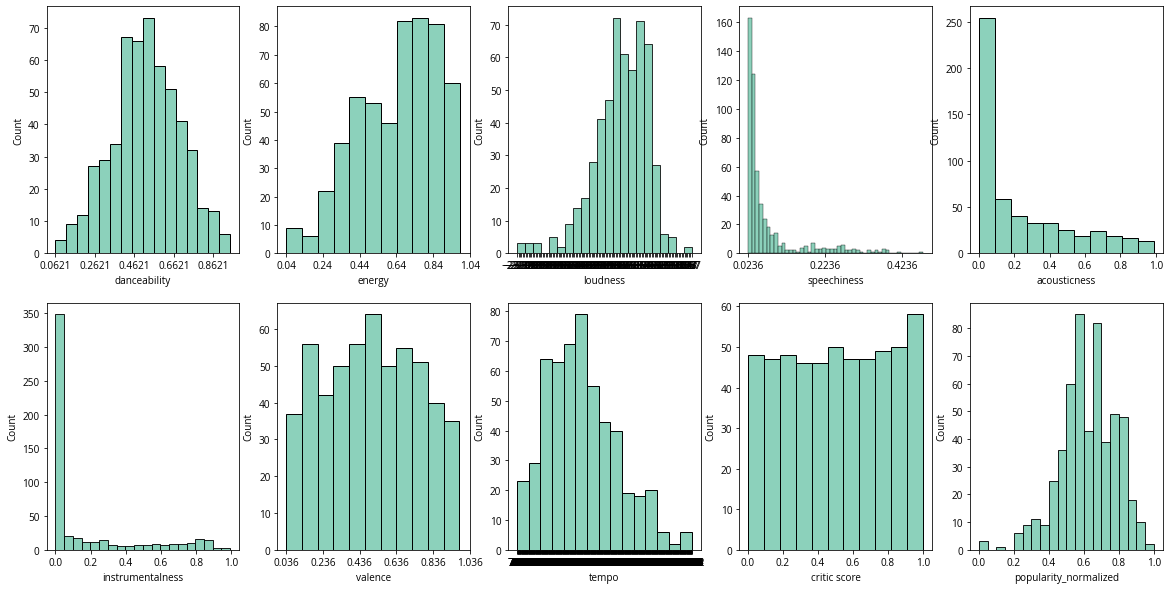

In [178]:
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = [axis for subl in axes for axis in subl]
for col, ax in zip(non_str_col, axes):
    sns.histplot(x=col, data=df5, ax=ax)
    ax.set_xticks(np.arange(min(df5[col]), max(df5[col])+0.1, step=0.2))

From this plot we can see that:

- The tempo and loudness column have a lot of unique value therefore we will need to visualize them one by one. 
- Speechiness is in a very narrow range
- Valence Energy and danceability have similar distribution
- Instrumentalness acousticness  can be put looked at together
- Critic score and popularity will be inspected together

Tempo, loudness and speechiness

In [179]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,10

* **tempo**:
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

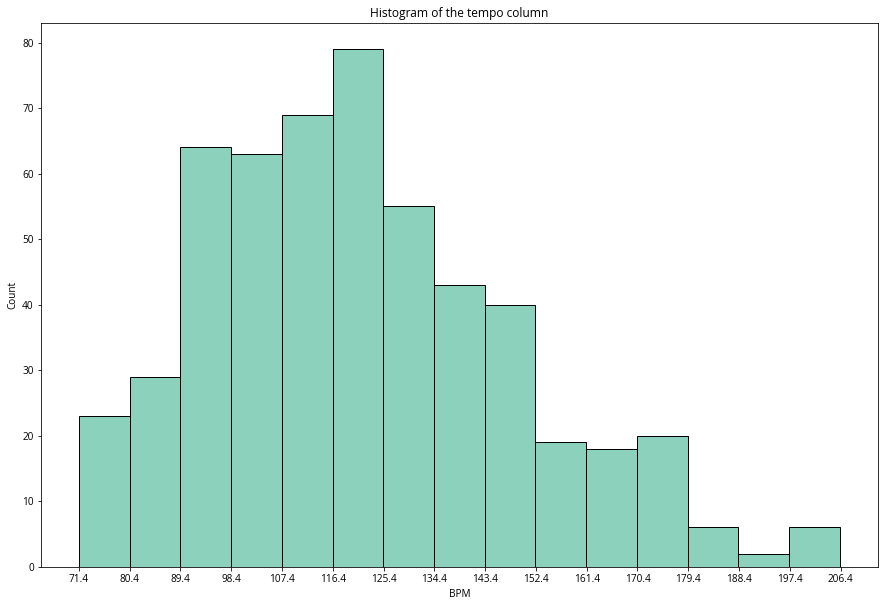

In [180]:
sns.histplot(x="tempo", data=df5)
plt.xlabel("BPM")
plt.title("Histogram of the tempo column")
plt.xticks(np.arange(min(df5["tempo"]), max(df5["tempo"])+9, step=9));

From the plot we cannot deduce meaningful conclusions, there fore we will use quantiles

In [181]:
quant_25_t, quant_50_t, quant_75_t= int(df5.tempo.quantile(0.25)),int(df5.tempo.quantile(0.50)),int(df5.tempo.quantile(0.75))
quant_25_t, quant_50_t, quant_75_t

(100, 118, 137)

In [182]:
np.min(df5.tempo), np.max(df5.tempo)

(71.398, 206.247)

In [183]:
df5['tem']=pd.cut(x=df5['tempo'], bins=[np.min(df5.tempo)-0.1,quant_25_t,quant_75_t,np.max(df5.tempo)], 
                        labels=["slow tempo","medium tempo","high tempo"])

* **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

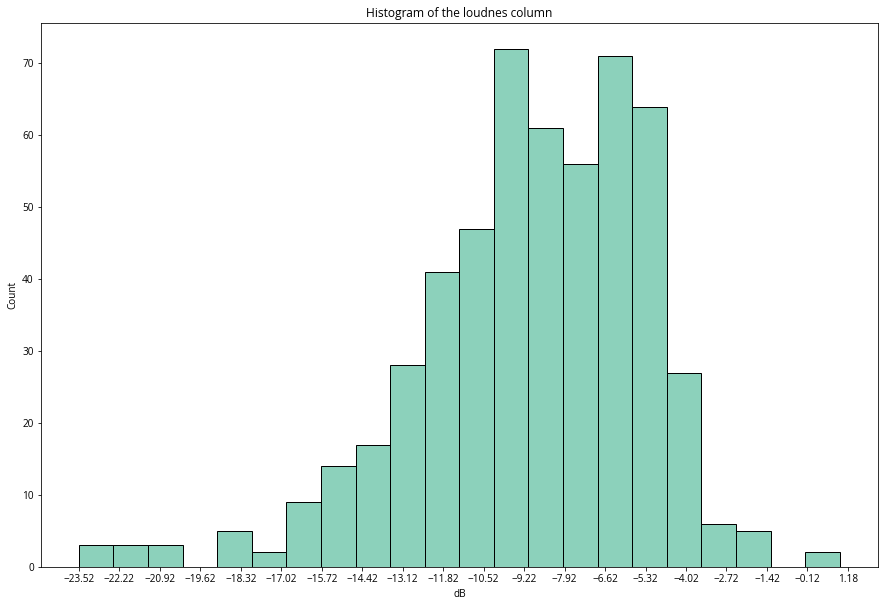

In [184]:
sns.histplot(x="loudness", data=df5)
plt.title("Histogram of the loudnes column")
plt.xlabel("dB")
plt.xticks(np.arange(min(df5["loudness"]), max(df5["loudness"]+1.3), step=1.3));

In [185]:
np.min(df5.loudness),np.max(df5.loudness)

(-23.525, 0.915)

In [186]:
quant_25, quant_50_l, quant_75= int(df5.loudness.quantile(0.25)),int(df5.loudness.quantile(0.50)),int(df5.loudness.quantile(0.75))
quant_25,quant_50_l,quant_75

(-10, -8, -6)

In [187]:
df5['loud']=pd.cut(x=df5['loudness'], bins=[np.min(df5.loudness)-0.1,quant_25,quant_50_l,np.max(df5.loudness)], 
                        labels=["quiet","normal","loud"])


* **speechiness**:
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values *above 0.66* describe tracks that are probably made entirely of spoken words. Values *between 0.33 and 0.66* describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values *below 0.33* most likely represent music and other non-speech-like tracks.



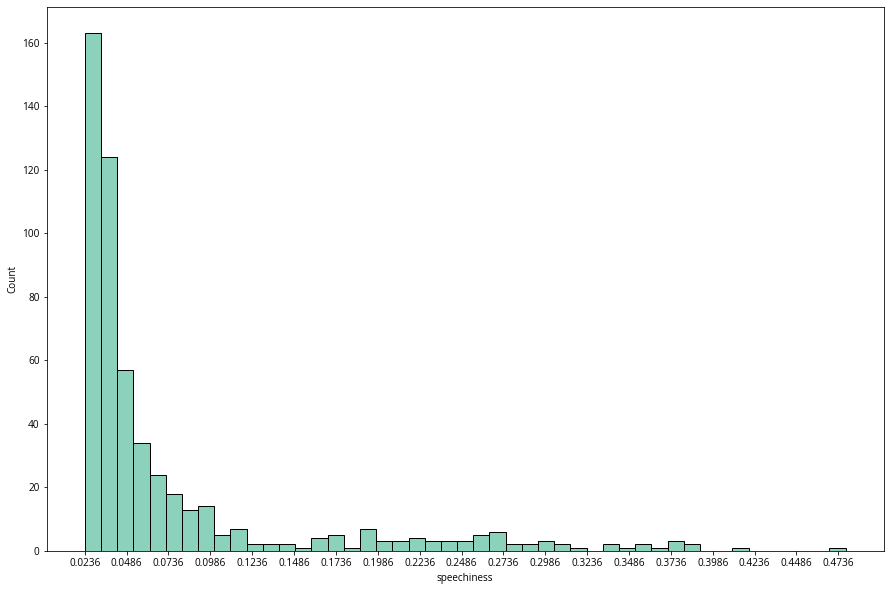

In [188]:
sns.histplot(x="speechiness", data=df5)
plt.xticks(np.arange(min(df5["speechiness"]), max(df5["speechiness"]+0.02), step=0.025));


inserisci spiegazione sui range dati

In [189]:
df5['speech']=pd.cut(x=df5['speechiness'], bins=[0,0.33,np.max(df5.speechiness)], 
                        labels=["normal song","verbose song"])


In [190]:
df6 = df5.drop(["speechiness","loudness","tempo"],axis=1)

## Grouped columns

In [191]:
column_list = df6.columns.tolist()
print(column_list)

['track_name', 'artists', 'album', 'danceability', 'energy', 'acousticness', 'instrumentalness', 'valence', 'critic score', 'popularity_normalized', 'era', 'dur', 'tem', 'loud', 'speech']


In [192]:
group1 = ['danceability', 'energy','valence']
group2 = ['acousticness', 'instrumentalness']
group3 = ['critic score', 'popularity_normalized']

## Group 1: 'danceability', 'energy','valence'

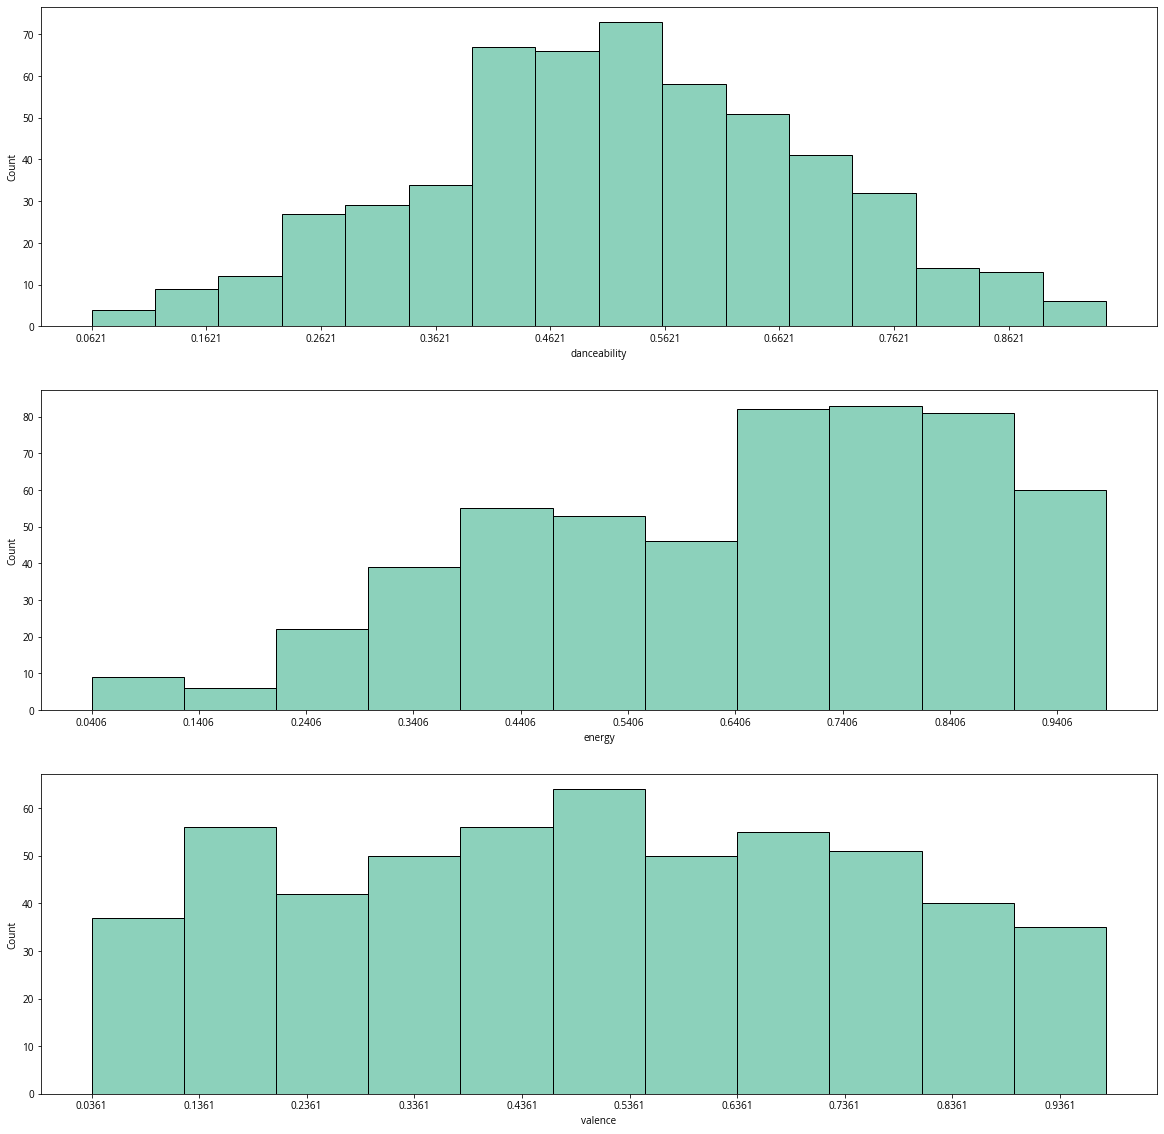

In [193]:
_, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
for col, ax in zip(group1, axes):
    sns.histplot(x=col, data=df6, ax=ax)
    ax.set_xticks(np.arange(min(df6[col]), max(df6[col]), step=0.1))


* **valence**:
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with *high valence* sound *more positive* (e.g. happy, cheerful, euphoric), while tracks with *low valence* sound *more negative* (e.g. sad, depressed, angry).


In [194]:
quant_25_v, quant_50_v, quant_75_v= df6.valence.quantile(0.25),df6.valence.quantile(0.50),df6.valence.quantile(0.75)
quant_25_v, quant_50_v, quant_75_v

(0.29, 0.502, 0.711)

In [195]:
df6['val']=pd.cut(x=df6['valence'], bins=[np.min(df6.valence)-0.1,0.33,quant_50_v,1], 
                        labels=["sad","neutral","euphoric"])



* **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.




In [196]:
quant_25_d, quant_50_d, quant_75_d= df6.danceability.quantile(0.25),df6.danceability.quantile(0.50),df6.danceability.quantile(0.75)
quant_25_d, quant_50_d, quant_75_d 

(0.40874999999999995, 0.519, 0.6375)

In [197]:
df6['dan']=pd.cut(x=df6['danceability'], bins=[-1,quant_25_d,quant_50_d,1], 
                        labels=["least danceable","neutral"," most danceable"])


* **energy**: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [198]:
quant_25_e, quant_50_e, quant_75_e= df6.energy.quantile(0.25),df6.energy.quantile(0.50),df6.energy.quantile(0.75)
quant_25_e, quant_25_e, quant_75_e 

(0.48124999999999996, 0.48124999999999996, 0.831)

In [199]:
df6['ene']=pd.cut(x=df6['energy'], bins=[-.01,quant_25_e,quant_50_e,1], 
                        labels=["slow","medium","energic"])


In [200]:
df6[df6.isnull().any(axis=1)]

,track_name,artists,album,danceability,energy,acousticness,instrumentalness,valence,critic score,popularity_normalized,era,dur,tem,loud,speech,val,dan,ene


In [201]:
df7 = df6.drop(group1,axis=1)

In [202]:
df7.head()

,track_name,artists,album,acousticness,instrumentalness,critic score,popularity_normalized,era,dur,tem,loud,speech,val,dan,ene
0,Wouldn't It Be Nice,The Beach Boys,Greatest Hits,0.724000,0.000000,1.000000,0.6125,contemporary,average,medium tempo,loud,normal song,euphoric,least danceable,medium
1,God Only Knows,The Beach Boys,50 Big Ones: Greatest Hits,0.156000,0.000000,1.000000,0.5000,contemporary,average,medium tempo,normal,normal song,neutral,neutral,slow
2,Sinnerman,Nina Simone,Pastel Blues,0.654000,0.000009,0.997996,0.6500,vintage,long,high tempo,quiet,normal song,euphoric,neutral,medium
3,How to Disappear Completely,Radiohead,Kid A,0.316000,0.797000,0.995992,0.7000,modern,long,medium tempo,quiet,normal song,sad,least danceable,slow
4,when you sleep,my bloody valentine,loveless,0.000034,0.738000,0.993988,0.6375,modern,above average,medium tempo,normal,normal song,sad,least danceable,energic


## Group 2: 'acousticness', 'instrumentalness' 

These two columns are very polarized towards zero therefore a boolean discretization is required

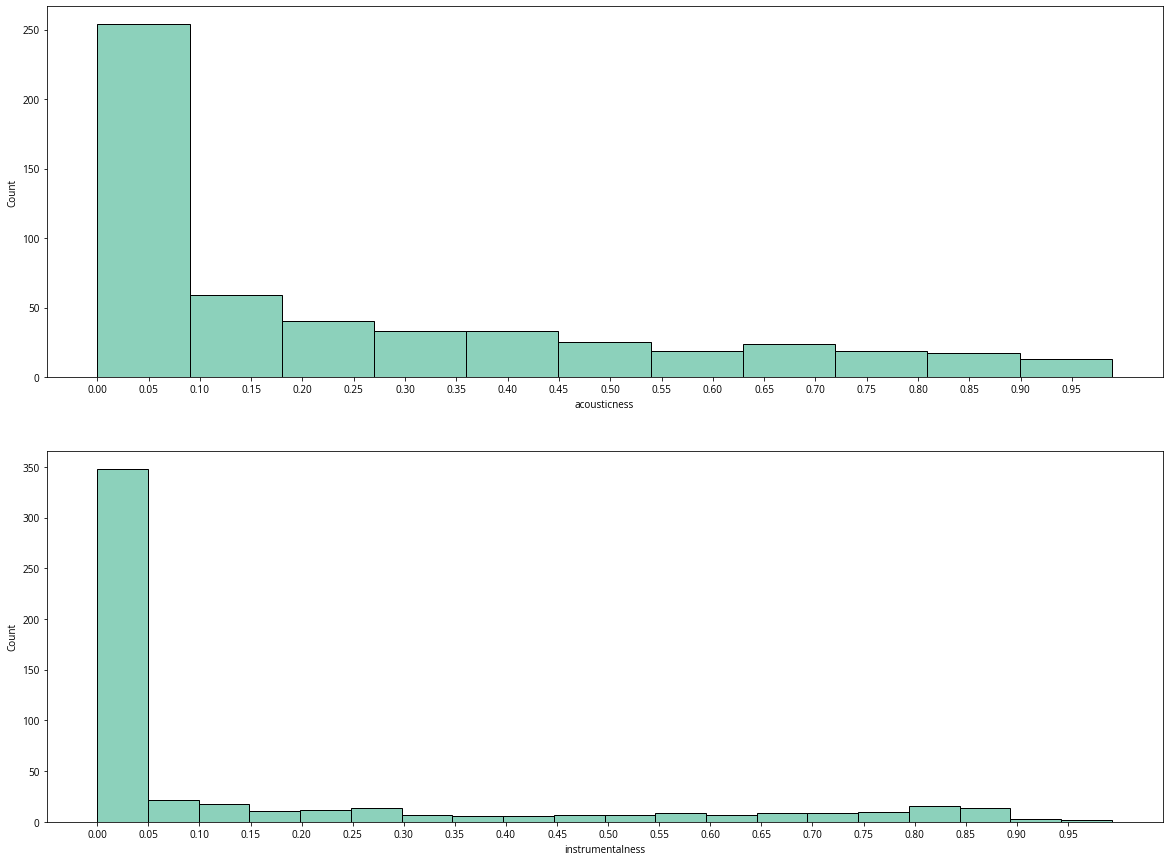

In [203]:
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
for col, ax in zip(group2, axes):
    sns.histplot(x=col, data=df7, ax=ax)
    ax.set_xticks(np.arange(min(df7[col]), max(df7[col]), step=0.05))




* **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values *above 0.5* are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


In [204]:
quant_25_i, quant_50_i, quant_75_i= df7.instrumentalness.quantile(0.25),df7.instrumentalness.quantile(0.50),df7.instrumentalness.quantile(0.75)
quant_25_i, quant_50_i, quant_75_i 

(9.1125e-06, 0.00352, 0.2095)

In [205]:
df7['instr']=pd.cut(x=df7['instrumentalness'], bins=[-.01,0.00352,quant_75_i], 
                        labels=["no instrumental","instrumental"])
# this column has been discretizated as boolean 


* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.


In [206]:
quant_25_a, quant_50_a, quant_75_a= df7.acousticness.quantile(0.25),df7.acousticness.quantile(0.50),df7.acousticness.quantile(0.75)
quant_25_a, quant_50_a, quant_75_a 

(0.014325000000000001, 0.111, 0.3975)

In [207]:
df7['aco']=pd.cut(x=df7['acousticness'], bins=[-.01,quant_50_a,1], 
                        labels=["electronic","acoustic"])


In [208]:
df8 =df7.drop(group2,axis=1)

In [209]:
df8.head()

,track_name,artists,album,critic score,popularity_normalized,era,dur,tem,loud,speech,val,dan,ene,instr,aco
0,Wouldn't It Be Nice,The Beach Boys,Greatest Hits,1.000000,0.6125,contemporary,average,medium tempo,loud,normal song,euphoric,least danceable,medium,no instrumental,acoustic
1,God Only Knows,The Beach Boys,50 Big Ones: Greatest Hits,1.000000,0.5000,contemporary,average,medium tempo,normal,normal song,neutral,neutral,slow,no instrumental,acoustic
2,Sinnerman,Nina Simone,Pastel Blues,0.997996,0.6500,vintage,long,high tempo,quiet,normal song,euphoric,neutral,medium,no instrumental,acoustic
3,How to Disappear Completely,Radiohead,Kid A,0.995992,0.7000,modern,long,medium tempo,quiet,normal song,sad,least danceable,slow,NaN,acoustic
4,when you sleep,my bloody valentine,loveless,0.993988,0.6375,modern,above average,medium tempo,normal,normal song,sad,least danceable,energic,NaN,electronic


## Group 3: 'Popularity', 'Critic score'

1. Popularity &rarr; minmax of the metric provided by the `Spotify API`
3. Critic Score &rarr; augmented knowledge, min/max del ranking

* **Popularity**: The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. 
The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. 
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity

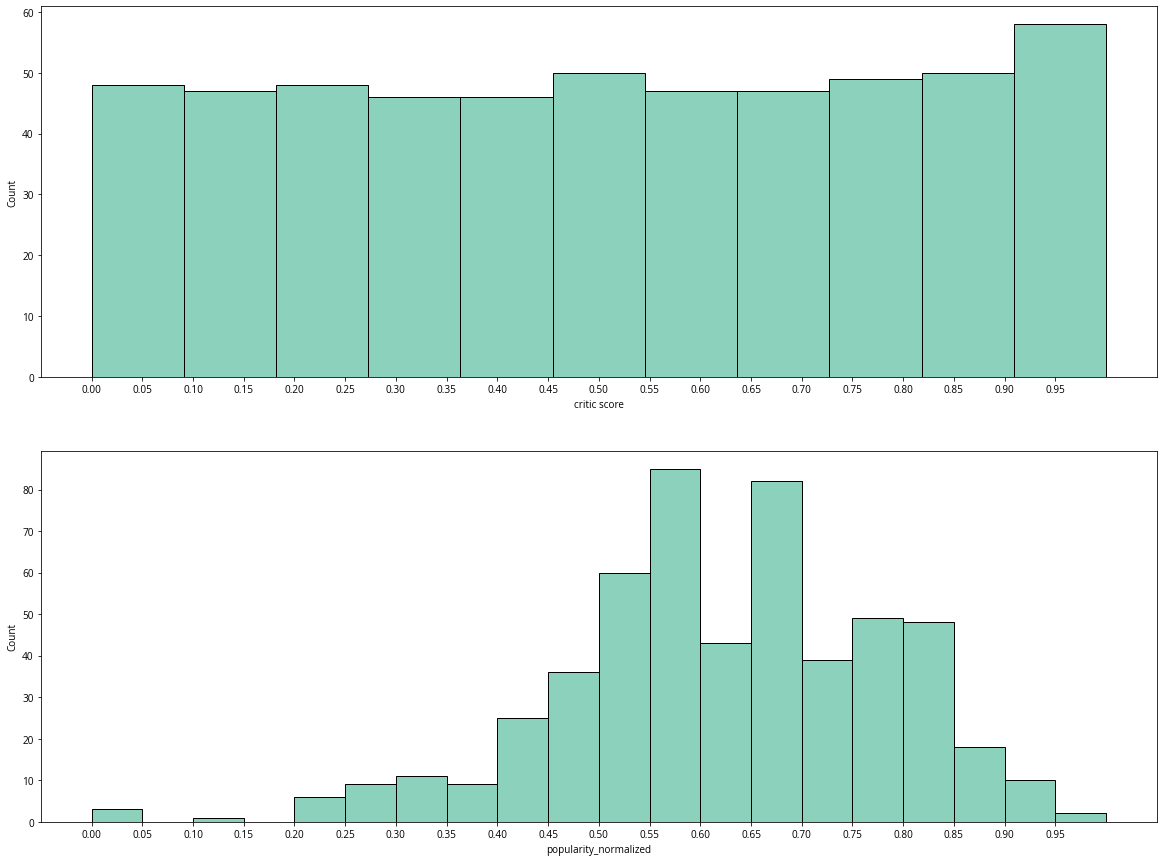

In [210]:
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
for col, ax in zip(group3, axes):
    sns.histplot(x=col, data=df8, ax=ax)
    ax.set_xticks(np.arange(min(df8[col]), max(df8[col]), step=0.05))


In [211]:
quant_25_p, quant_50_p, quant_75_p= df8.popularity_normalized.quantile(0.25),df8.popularity_normalized.quantile(0.50),df8.popularity_normalized.quantile(0.75)
quant_25_p, quant_50_p, quant_75_p 

(0.525, 0.625, 0.7375)

In [212]:
df8['pop']=pd.cut(x=df8['popularity_normalized'], bins=[-.01,quant_50_p,quant_75_p,1], 
                        labels=["not popular","middle","very popular"])

In [213]:
quant_25_c, quant_50_c, quant_75_c= round(df8['critic score'].quantile(0.25),2),round(df8['critic score'].quantile(0.50),2),round(df8['critic score'].quantile(0.75),2)
quant_25_c, quant_50_c, quant_75_c

(0.26, 0.52, 0.77)

In [214]:
df8['crit']=pd.cut(x=df8['critic score'], bins=[-.01,quant_25_c,quant_50_c,1], 
                        labels=["not critically acclaimed","average critical","critically acclaimed"])

In [215]:
df8.head()

,track_name,artists,album,critic score,popularity_normalized,era,dur,tem,loud,speech,val,dan,ene,instr,aco,pop,crit
0,Wouldn't It Be Nice,The Beach Boys,Greatest Hits,1.000000,0.6125,contemporary,average,medium tempo,loud,normal song,euphoric,least danceable,medium,no instrumental,acoustic,not popular,critically acclaimed
1,God Only Knows,The Beach Boys,50 Big Ones: Greatest Hits,1.000000,0.5000,contemporary,average,medium tempo,normal,normal song,neutral,neutral,slow,no instrumental,acoustic,not popular,critically acclaimed
2,Sinnerman,Nina Simone,Pastel Blues,0.997996,0.6500,vintage,long,high tempo,quiet,normal song,euphoric,neutral,medium,no instrumental,acoustic,middle,critically acclaimed
3,How to Disappear Completely,Radiohead,Kid A,0.995992,0.7000,modern,long,medium tempo,quiet,normal song,sad,least danceable,slow,NaN,acoustic,middle,critically acclaimed
4,when you sleep,my bloody valentine,loveless,0.993988,0.6375,modern,above average,medium tempo,normal,normal song,sad,least danceable,energic,NaN,electronic,middle,critically acclaimed


In [216]:
strings = ["track_name","artists","album"]


In [217]:
df9 = df8.drop(group3+strings, axis=1) #drop useless columns
df9.head()

,era,dur,tem,loud,speech,val,dan,ene,instr,aco,pop,crit
0,contemporary,average,medium tempo,loud,normal song,euphoric,least danceable,medium,no instrumental,acoustic,not popular,critically acclaimed
1,contemporary,average,medium tempo,normal,normal song,neutral,neutral,slow,no instrumental,acoustic,not popular,critically acclaimed
2,vintage,long,high tempo,quiet,normal song,euphoric,neutral,medium,no instrumental,acoustic,middle,critically acclaimed
3,modern,long,medium tempo,quiet,normal song,sad,least danceable,slow,NaN,acoustic,middle,critically acclaimed
4,modern,above average,medium tempo,normal,normal song,sad,least danceable,energic,NaN,electronic,middle,critically acclaimed


# Network structure

In [218]:
df5.columns.tolist()

['track_name',
 'artists',
 'album',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'valence',
 'tempo',
 'critic score',
 'popularity_normalized',
 'era',
 'dur',
 'tem',
 'loud',
 'speech']

loud,Era,acoustic,

In order to restrict the scope of the project columns which are irrelevant and are too specific
to handle only attributes that have been considered particularly relevant were considered. 

From the preprocessing we have obtained the following discretization, the variables name have been shortened to make the network more compact. A description of each abbreviation for readibility.

- year &rarr; 'era',
- duration_ms &rarr; 'dur',
- instrumentalness &rarr; 'instr',
- speechiness &rarr; 'speech',
- valence &rarr; 'val',
- danceability &rarr; 'dan',
- acousticness &rarr; 'aco',
- popularity &rarr; 'pop',
- critic score &rarr; 'crit',
- tempo &rarr; 'tem',
- loudness &rarr; 'loud',
- energy &rarr; 'ene'

Connections between nodes have been implemented firstly by looking at correlation between columns and also ...   

# Bayesian network example


Direct cause


Causal trail

Common effect

### Analyzing the network

1. Fai grafico con daft
2. esportalo in model (poi riscrivilo a mano il model)
3. 

In [219]:
from pgmpy.models import BayesianModel 

In [220]:
import daft
import matplotlib.pyplot as plt
from daft import PGM

- loudness &rarr; energy
- year &rarr; energy 
- acousticness &rarr; loudness, energy 
- valence &rarr; danceability,energy

- lvl piu alto: dec dur
- sotto: instr speech acou 
- piu sotto: val

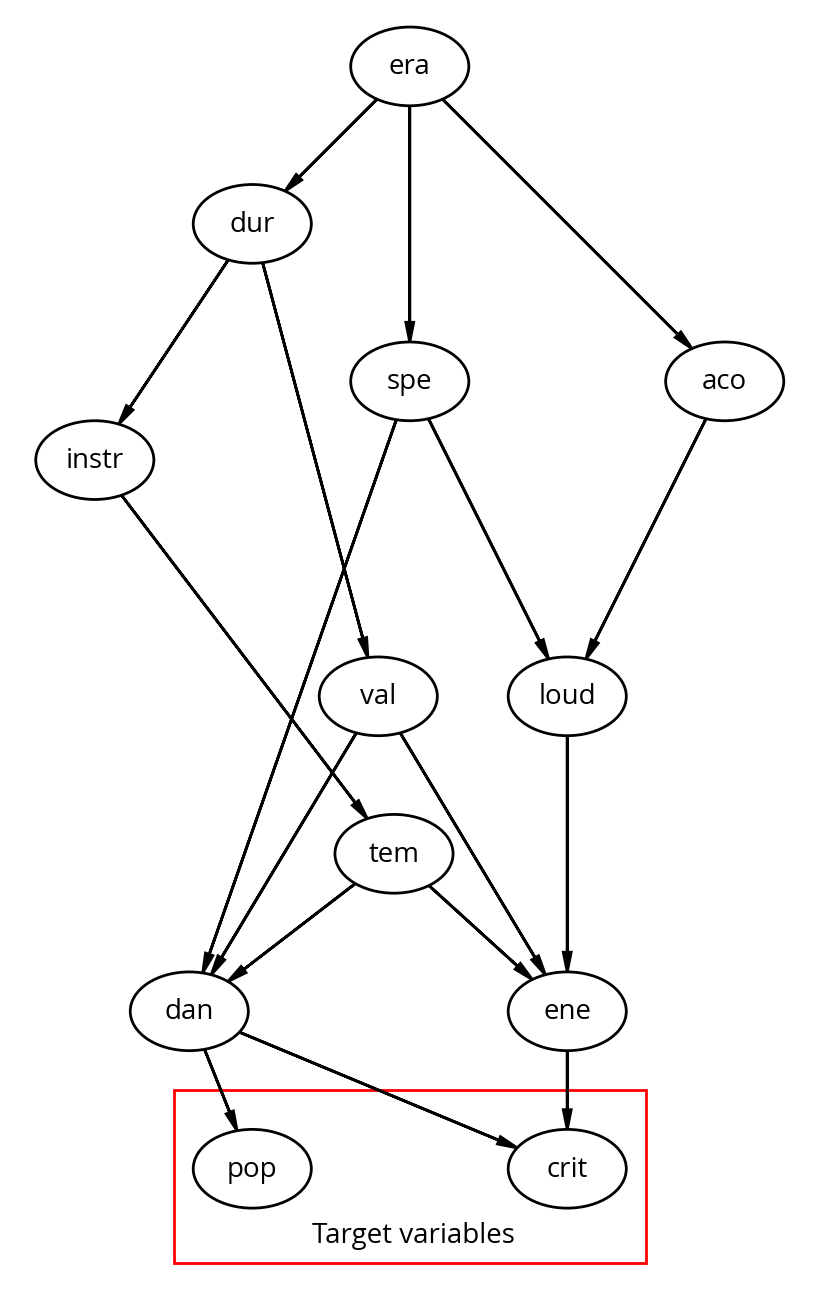

In [304]:
pgm = daft.PGM(aspect=1.5,directed=True,dpi=200,shape=[5,8])

# lvl5
plt.rcParams["figure.facecolor"] = "w"



pgm.add_node('era', r"era", 3, 8)
pgm.add_node(daft.Node('dur', r"dur", 2, 7))

# lvl4
pgm.add_node(daft.Node('speech', r"spe", 3, 6))
pgm.add_node(daft.Node('aco', r"aco", 5, 6))

#lvl 3
pgm.add_node(daft.Node('instr', r"instr", 1, 5.5))
pgm.add_node(daft.Node('val', r"val", 2.8,4))
pgm.add_node(daft.Node('loud', r"loud", 4, 4))

#lvl 2

pgm.add_node(daft.Node('tem', r"tem", 2.9, 3))
pgm.add_node(daft.Node('ene', r"ene", 4, 2))
pgm.add_node(daft.Node('dance', r"dan", 1.6, 2))

#lvl 1
pgm.add_node(daft.Node('pop', r"pop", 2, 1))
pgm.add_node(daft.Node('crit', r"crit", 4, 1))

#edges

pgm.add_edge('era', 'dur')
# lvl5-4
pgm.add_edge('era', 'aco')
pgm.add_edge('era', 'speech')


# lvl4-3
pgm.add_edge('dur', 'instr')
pgm.add_edge('instr', 'tem')
pgm.add_edge('dur', 'val')
pgm.add_edge('speech', 'loud')
pgm.add_edge('aco', 'loud')

# lvl4-2
pgm.add_edge('speech', 'dance')
pgm.add_edge('val', 'dance')
pgm.add_edge('val', 'ene')

# lvl3-2
pgm.add_edge('loud', 'ene')
pgm.add_edge('tem', 'ene')
pgm.add_edge('tem', 'dance')


pgm.add_edge('dance', 'pop')
pgm.add_edge('dance', 'crit')
# lvl2-1
pgm.add_edge('ene', 'crit')


pgm.add_plate([1.5,0.5,3, 1],label=r"Target variables ",shift=-0.1,label_offset=[50,5],rect_params={"ec":"red"})

# pgm._nodes['era'].render(node_ec='blue')



pgm.render()
plt.show()

In [292]:
import warnings
warnings.filterwarnings("ignore")

In [291]:
def convert_pgm_to_pgmpy(pgm):
    """Takes a Daft PGM object and converts it to a pgmpy BayesianModel"""
    edges = [(edge.node1.name, edge.node2.name) for edge in pgm._edges]
    model = BayesianModel(edges)
    return model

In [305]:
model = convert_pgm_to_pgmpy(pgm)


In [306]:
# Showing all the nodes of the model
model.nodes()

NodeView(('era', 'dur', 'aco', 'speech', 'instr', 'tem', 'val', 'loud', 'dance', 'ene', 'pop', 'crit'))

In [307]:
# Showing all the edges of the model
model.edges()

OutEdgeView([('era', 'dur'), ('era', 'aco'), ('era', 'speech'), ('dur', 'instr'), ('dur', 'val'), ('aco', 'loud'), ('speech', 'loud'), ('speech', 'dance'), ('instr', 'tem'), ('tem', 'ene'), ('tem', 'dance'), ('val', 'dance'), ('val', 'ene'), ('loud', 'ene'), ('dance', 'pop'), ('dance', 'crit'), ('ene', 'crit')])

In [308]:
# Local independecies of a signle node, namely "high_blood_pressure".
# In this simplification of a real case structure gender and age don't influence directly hypertension given their influence on other factors such as anaemia, diabetes and chemicals
model.local_independencies("ene")

(ene ⟂ aco, speech, era, instr, pop, dance, dur | tem, loud, val)

In [311]:
# Checking d-separation between variables with and without evidence
# Two sets of nodes X, Y are d-separated given Z if there is no active trail between any X ∈ X and Y ∈ Y given Z

print(model.is_dconnected("ene", "aco"))
print(model.is_dconnected("val", "popularity",observed=["dance"] ))

True
False


In [332]:
# Function is_irrelevant made from scratch by the definition of irrelevance given during the course 

def is_irrelevant (node1,node2,evidence):
  if ((node2 in (model.get_ancestral_graph(node1)and model.get_ancestral_graph(evidence))) and model.is_dconnected(node1, node2,observed=evidence )):
    print("The node {0} is not irrelevant with respect to {1}, given the evidence {2}.".format(node1, node2, evidence))
  else:
    print("The node {0} is irrelevant with respect to {1}, given the evidence {2}".format(node1, node2, evidence))


is_irrelevant("dance", "loud", "instr")


The node dance is irrelevant with respect to loud, given the evidence instr


In [333]:
# Checking active trails from high blood pressure given the evidence diabetes
model.active_trail_nodes('ene', observed='dance')

{'ene': {'aco',
  'crit',
  'dur',
  'ene',
  'era',
  'instr',
  'loud',
  'speech',
  'tem',
  'val'}}

### Parameter learning

##  Inferences

###  Exact Inference

The library provides 4 different heuristics:
* `MinFill`: the cost of removing the node is equal to the number of edges that need to be added to the network after its elimination.
* `MinNeighbors`: removing a node has a cost equal to the number of neighbors it has in the current architecture. 
* `MinWeight`: to every node is assigned a weight given by its domain cardinality; then, the cost of removing a node is equal to the product of the weights of its neighbors
* `WeightedMinFill`: to every edge is assigned a weight given by the product of the domain cardinality of its vertices; then, the cost of removing node A is given by the sum of the weights of the edges we'll need to add to the network after its elimination.


### Approximate Inference

###  Query 1:

###  Query 2: 

###  Query 3: 

###  Query 4: 